In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("time-series-19-covid-combined.csv")

In [3]:
df.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,NaN,33.93911,67.709953,0,0.0,0


In [4]:
df.tail()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
72085,2020-10-13,Zimbabwe,NaN,-19.015438,29.154857,8036,7632.0,230
72086,2020-10-14,Zimbabwe,NaN,-19.015438,29.154857,8055,7640.0,231
72087,2020-10-15,Zimbabwe,NaN,-19.015438,29.154857,8075,7669.0,231
72088,2020-10-16,Zimbabwe,NaN,-19.015438,29.154857,8099,7673.0,231
72089,2020-10-17,Zimbabwe,NaN,-19.015438,29.154857,8110,7673.0,231


In [5]:
df.shape

(72090, 8)

In [6]:
df.isnull().sum()

Date                  0
Country/Region        0
Province/State    50220
Lat                   0
Long                  0
Confirmed             0
Recovered          3780
Deaths                0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

Date              0
Country/Region    0
Province/State    0
Lat               0
Long              0
Confirmed         0
Recovered         0
Deaths            0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18090 entries, 2020-01-22 to 2020-10-17
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  18090 non-null  object 
 1   Province/State  18090 non-null  object 
 2   Lat             18090 non-null  float64
 3   Long            18090 non-null  float64
 4   Confirmed       18090 non-null  int64  
 5   Recovered       18090 non-null  float64
 6   Deaths          18090 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


In [13]:
duplicates = df.index.duplicated(keep='first')
print(duplicates[duplicates])

[ True  True  True ...  True  True  True]


In [14]:
df = df[~duplicates]

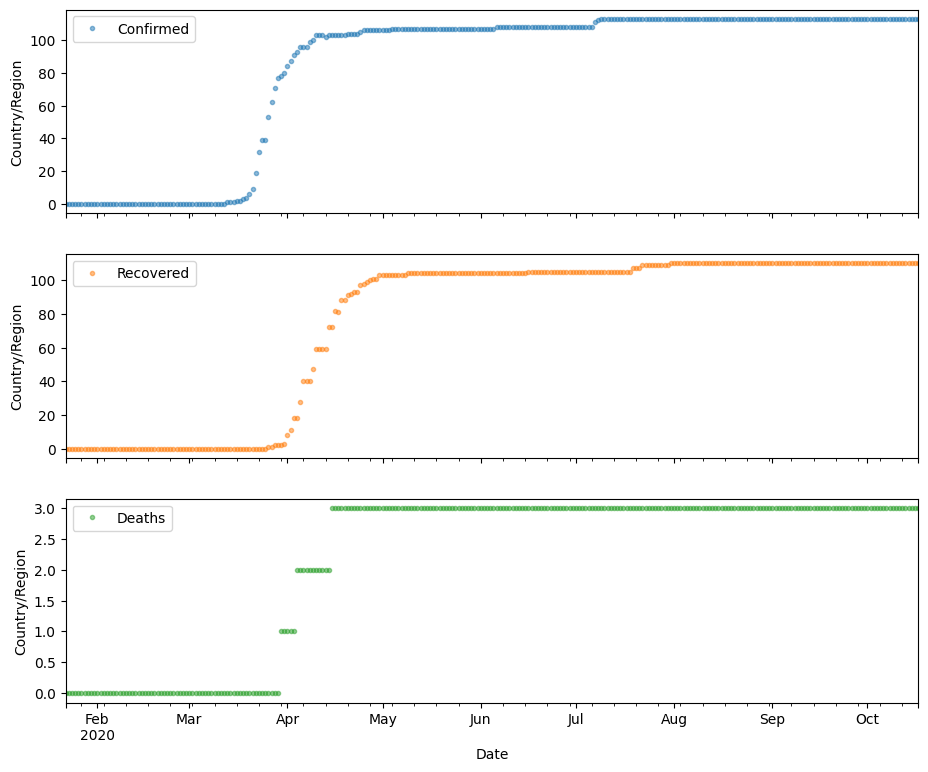

In [24]:
cols_plot = ['Confirmed', 'Recovered', 'Deaths']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Country/Region')

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Confirmed'], model='additive')

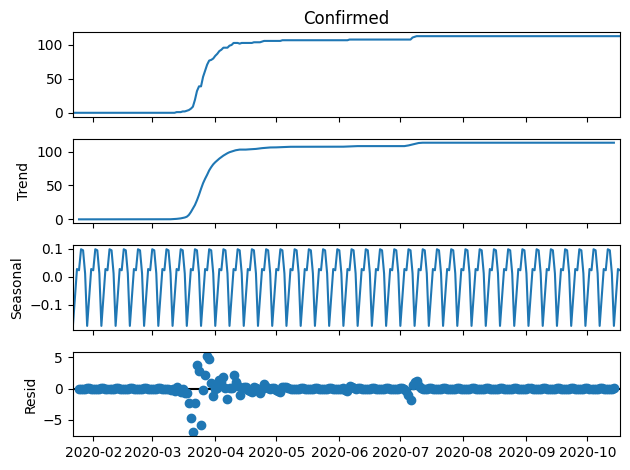

In [17]:
fig = decomposition.plot()
plt.show()

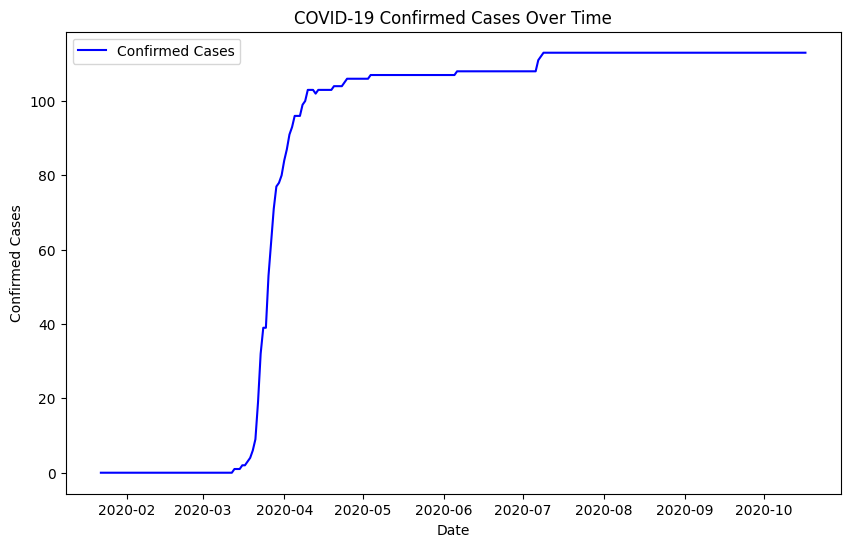

In [18]:
# Visualize confirmed cases over time
plt.figure(figsize=(10, 6))
plt.plot(df['Confirmed'], label='Confirmed Cases', color='blue')
plt.title('COVID-19 Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1200x600 with 0 Axes>

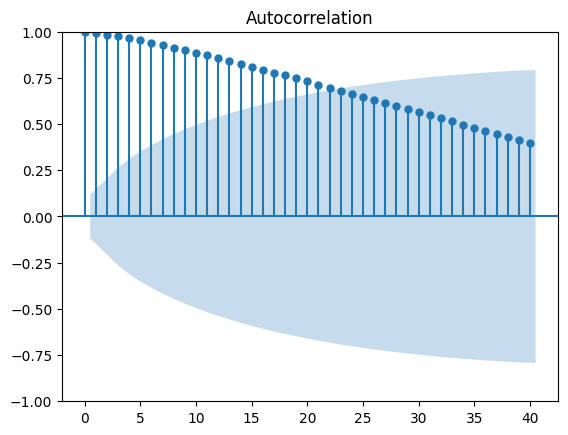

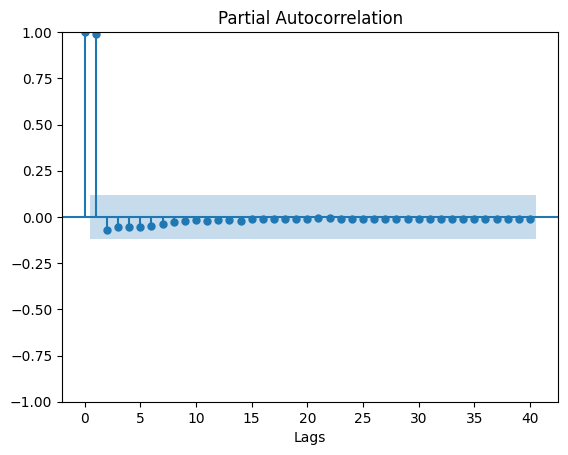

In [21]:
# Autocorrelation and partial autocorrelation plots
plt.figure(figsize=(12, 6))
plot_acf(df['Confirmed'], lags=40, alpha=0.05)
plot_pacf(df['Confirmed'], lags=40, alpha=0.05)
plt.xlabel('Lags')
plt.show()

C:\Python10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Python10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Python10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


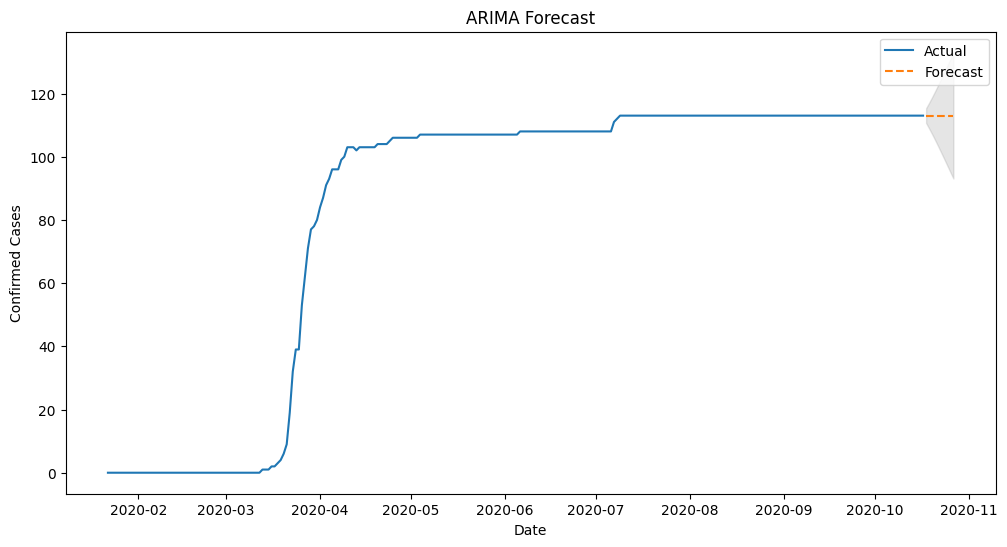

In [29]:

# Determine appropriate values for p, d, and q
p = 1
d = 1
q = 1

# Fit ARIMA model
model = ARIMA(df['Confirmed'], order=(p, d, q))
model_fit = model.fit()

# Make predictions
n = 10  # Number of steps to forecast
forecast = model_fit.get_forecast(steps=n)

plt.figure(figsize=(12, 6))

# Plot predictions
plt.plot(df.index, df['Confirmed'], label='Actual')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean.values, label='Forecast', linestyle='dashed')
plt.fill_between(forecast.conf_int().index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='gray', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()